***Topic***

- Rank Function </br>
  (Rank minimum value to maximum for a column)
  - Different types of Rank function
- GroupBy and Covert to Dictionary
- Find value in one column and assign in another
- Freuency Count when value exist in multiple row
-GroupBy Assign Minimum Value
-Remove digit when columns contain SET
-Multiple Rectangle in Same Figure from Column Values  

# **Rank Function**

In [125]:
import pandas as pd

In [126]:

df = pd.DataFrame(data={'Animal': ['fox', 'Kangaroo', 'deer',
                                   'spider', 'fox'],
                        'Number_legs': [4, 2, 4, 8, 7]})
df

,Animal,Number_legs
0,fox,4
1,Kangaroo,2
2,deer,4
3,spider,8
4,fox,7


In [129]:
df['default_rank'] = df['Number_legs'].rank()
df

,Animal,Number_legs,default_rank
0,fox,4,2.5
1,Kangaroo,2,1.0
2,deer,4,2.5
3,spider,8,5.0
4,fox,7,4.0


**Different types of ranking**

In [132]:
df['default_rank'] = df['Number_legs'].rank()
df['max_rank'] = df['Number_legs'].rank(method='max')
df['NA_bottom'] = df['Number_legs'].rank(na_option='bottom')
df['pct_rank'] = df['Number_legs'].rank(pct=True)
df

,Animal,Number_legs,default_rank,max_rank,NA_bottom,pct_rank
0,fox,4,2.5,3.0,2.5,0.5
1,Kangaroo,2,1.0,1.0,1.0,0.2
2,deer,4,2.5,3.0,2.5,0.5
3,spider,8,5.0,5.0,5.0,1.0
4,fox,7,4.0,4.0,4.0,0.8


# **GroupBy and Covert to Dictionary**

In [133]:
df = pd.DataFrame(data={'Animal': ['fox', 'Kangaroo', 'deer',
                                   'spider', 'fox'],
                        'Number_legs': [4, 2, 4, 8, 7]})
df

,Animal,Number_legs
0,fox,4
1,Kangaroo,2
2,deer,4
3,spider,8
4,fox,7


In [134]:
df.groupby('Animal')['Number_legs'].apply(list).to_dict()

{'Kangaroo': [2], 'deer': [4], 'fox': [4, 7], 'spider': [8]}

# **Find value in one column and assign in another**

In [136]:
import numpy as np
df = pd.DataFrame(data={'Checklist': ['Log', 'Sequence', 'Log',
                                   'spider', 'fox']})
df['SITT'] = np.nan
df

,Checklist,SITT
0,Log,NaN
1,Sequence,NaN
2,Log,NaN
3,spider,NaN
4,fox,NaN


In [137]:


df['SITT'] = df['SITT'].astype(str)
for i, e in enumerate(df['Checklist']):
    if e=='Log':
        df.at[i,'SITT']='y'
    if e=='Sequence':
        df.at[i,'SITT']='n'
df['SITT'] = df['SITT'].replace('nan', np.nan)
df

,Checklist,SITT
0,Log,y
1,Sequence,n
2,Log,y
3,spider,NaN
4,fox,NaN


# **Freuency Count when value exist in multiple row**

In [138]:
df = pd.DataFrame(data={'industry': ['Home', 'Home', 'Company',
                                   'Company'], 'name': ['mike', 'mike,angela,roy', 'roy,jab', 'roy,jab']})
df

,industry,name
0,Home,mike
1,Home,"mike,angela,roy"
2,Company,"roy,jab"
3,Company,"roy,jab"


In [139]:
df['name2'] = df['name'].str.split(',')
df


,industry,name,name2
0,Home,mike,[mike]
1,Home,"mike,angela,roy","[mike, angela, roy]"
2,Company,"roy,jab","[roy, jab]"
3,Company,"roy,jab","[roy, jab]"


In [140]:

df.explode('name2').groupby(['industry', 'name2'], as_index=False).count()

,industry,name2,name
0,Company,jab,2
1,Company,roy,2
2,Home,angela,1
3,Home,mike,2
4,Home,roy,1


# **GroupBy Assign Minimum Value**

In [141]:
df = pd.DataFrame(data={'Animal': ['fox', 'deer', 'fox',
                                   'spider', 'deer'],'color': ['brown', 'green', 'black',
                                   'blue', 'green'],
                        'Number_legs': [4, 2, 8, 8, 7], 'rand': ['a','a','a','b','b']})
df

,Animal,color,Number_legs,rand
0,fox,brown,4,a
1,deer,green,2,a
2,fox,black,8,a
3,spider,blue,8,b
4,deer,green,7,b


In [142]:
dfc = df.groupby(['Animal','color'])['Number_legs']
df = df.assign(start=dfc.transform(min))
df

,Animal,color,Number_legs,rand,start
0,fox,brown,4,a,4
1,deer,green,2,a,2
2,fox,black,8,a,8
3,spider,blue,8,b,8
4,deer,green,7,b,2


# **Remove digit when columns contain SET**

In [143]:
df = pd.DataFrame(data={'value': [{'a','b',5,'c'},{'a','b','d','c'}, {'a',3,5,'c'} ]})
df

,value
0,"{b, c, 5, a}"
1,"{b, c, d, a}"
2,"{c, 5, 3, a}"


In [144]:
for i, e in enumerate(df['value']):
    myl = list(e)
    duplicate = myl.copy()
    for item in myl:
         it = str(item)
         if it.isdigit():
            duplicate.remove(item)
    e = set(duplicate)
    df.at[i,'value']=e

df

,value
0,"{b, c, a}"
1,"{b, c, d, a}"
2,"{c, a}"


# **Multiple Rectangle in Same Figure from Column Values**

In [122]:
df = pd.DataFrame(data={
                        'x': [.4, .8, .12], 'y': [.1,.2,.3], 'height': [.2,.3,.4], 'width':[.2,.4,.6]})

df

,x,y,height,width
0,0.40,0.1,0.2,0.2
1,0.80,0.2,0.3,0.4
2,0.12,0.3,0.4,0.6


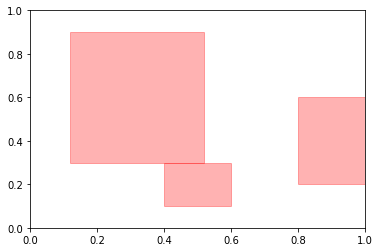

In [124]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = []
for index,row in df.iterrows():
        
          rect.append( plt.Rectangle((row.x, row.y), row.height, row.width, color='r', alpha=0.3) )
          
for l in rect:
  ax.add_patch(l)